In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from scipy import interpolate


df = pd.read_csv('Facting_Data.csv')
df_melt = pd.melt(df, id_vars='X_Axis', var_name='var', value_name='value')
df, df_melt


(    X_Axis       60       55       50      45      40      35      30      25
 0      360   7.6821   7.3053   6.0619  7.6628  8.3848  9.2971  9.2372  8.6967
 1      370   7.1166   7.0108   6.5378  7.7374  8.4002  9.1590  9.0612  7.8567
 2      380   6.2423   6.3366   6.1613  6.9001  7.4425  8.1681  7.7771  6.9062
 3      390   5.3379   5.5059   5.4587  5.8385  6.2378  6.7344  6.3799  5.7448
 4      400   4.4369   4.5943   4.5685  4.7075  4.9636  5.3273  5.0153  4.4864
 5      410   3.5337   3.6765   3.6402  3.7000  3.8173  4.1257  3.8898  3.4693
 6      420   2.8664   3.0402   3.0192  3.0142  3.0933  3.3515  3.1961  2.8586
 7      430   2.4889   2.7031   2.6770  2.6541  2.7015  2.9365  2.8073  2.5205
 8      440   2.2590   2.4977   2.4587  2.4136  2.4313  2.6138  2.5083  2.2610
 9      450   2.1903   2.4267   2.3690  2.2875  2.2590  2.4194  2.3193  2.0908
 10     460   2.2336   2.4609   2.3726  2.2276  2.1406  2.2789  2.1713  1.9664
 11     470   2.4132   2.6218   2.4909  2.2520  2.07

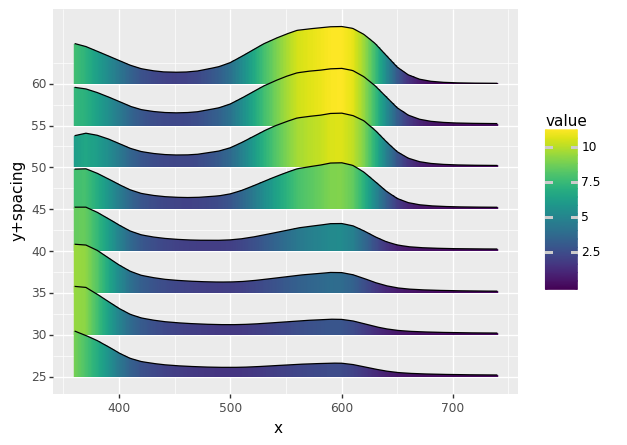

<ggplot: (121699102049)>


In [2]:
mydata = pd.DataFrame(columns=['x', 'y', 'var'])
list_var = np.unique(df_melt['var'])
N = 300
for i in list_var:
    x = df.loc[:, 'X_Axis']
    y = df.loc[:, i]
    f = interpolate.interp1d(x, y)  # , kind='slinear')#kind='linear',
    x_new = np.linspace(np.min(x), np.max(x), N)
    y_new = f(x_new)
    mydata = mydata.append(pd.DataFrame(
        {'x': x_new, 'y': y_new, 'var': np.repeat(i, N)}))

height = 8
mydata['var'] = pd.Categorical(mydata['var'], categories=np.unique(df_melt['var']), ordered=True)
mydata['spacing'] = mydata['var'].values.codes*height

labels = np.unique(df_melt['var'])
breaks = np.arange(0, len(labels)*height, height)

base_plot = (ggplot())
for i in np.unique(df_melt['var'])[::-1]:
    mydata_temp = mydata[mydata['var'] == i]
    base_plot = (base_plot +
                 geom_linerange(mydata_temp, aes(x='x', ymin='spacing', ymax='y+spacing', color='y'), size=1) +
                 geom_line(mydata_temp, aes(x='x', y='y+spacing'), color="black", size=0.5))
base_plot = (base_plot+scale_color_cmap(name='Spectral_r') +
             scale_y_continuous(breaks=breaks, labels=labels) +
             guides(color=guide_colorbar(title='value')) +
             theme(dpi=100, figure_size=(6, 5)))
print(base_plot)
